# 1. Importando bibliotecas

In [27]:
# !pip install pandas_ta
# !pip install yfinance
# !pip install matplotlib
# !pip install pandas_ta
# !pip freeze > requirements.txt
# !pip install -r requirements.txt

In [28]:
from funcoes import *
import matplotlib.pyplot as plt
import pandas_ta as ta
import yfinance as yf
import pandas as pd
import time
from decimal import Decimal
from datetime import date
import os

# 2. Obtendo os dados historicos das ações

## 2.1 Parâmetros

In [29]:
lista_acoes = [    
    'PETR4.SA',    # Petrobras
    'TAEE11.SA',   # Taesa    
    'NVDA',        # Nvidia
    'BBAS3.SA',    # Bradesco
    'NFLX',        # Netflix     
    'EA',          # EA
    'TSLA']        # Tesla


data_inicio = '2020-01-01' # data de inicio do historico que voce deseja obter
data_fim = date.today()   # data final do perido para o historico
# FORMATO-> "AAAA-MM-DD" 

In [30]:
%%time

caminho_pasta = 'Base_dados'
lista_arquivosinicio = [arquivo for arquivo in os.listdir(caminho_pasta) if os.path.isfile(os.path.join(caminho_pasta, arquivo))]

print(lista_arquivosinicio)
# Verifica se a pasta não está vazia
# os.listdir lista os arquivos e diretórios contidos em um diretório especifico, então se não retornar nada, está vazia
if os.listdir(caminho_pasta): # se não está vazio, exclui os arquivos e os cria novamente
    print(f'A pasta "{caminho_pasta}" contém arquivos.')

    # Percorre a lista de arquivos e subdiretórios
    for arq in lista_arquivosinicio:
        caminho = os.path.join(caminho_pasta, arq)
        os.remove(caminho)
        print(f'Arquivo {caminho} excluído.')
    
    hist_data(data_inicio, data_fim, lista_acoes) # FUNCAO PARA OBTERMOS OS DADOS HISTORICOS DAS ACOES INDICADAS NA LISTA

    lista_arquivosdepois = [arquivo for arquivo in os.listdir(caminho_pasta) if os.path.isfile(os.path.join(caminho_pasta, arquivo))]
    print()
    for arq in lista_arquivosdepois:
        caminho = os.path.join(caminho_pasta, arq)
        print(f'Arquivo {caminho} criado.')

else: # se esta vazio, cria os arquivos
    hist_data(data_inicio, data_fim, lista_acoes) # FUNCAO PARA OBTERMOS OS DADOS HISTORICOS DAS ACOES INDICADAS NA LISTA
    lista_arquivosdepois = [arquivo for arquivo in os.listdir(caminho_pasta) if os.path.isfile(os.path.join(caminho_pasta, arquivo))]
    for arq in lista_arquivosdepois:
        caminho = os.path.join(caminho_pasta, arq)
        print(f'Arquivo {caminho} criado.')

"""
    Informacao sobre os dados historicos gerados:
        É gerado um DataFrame com as seguintes variáveis / colunas para cada acao ---> 
            "Date"     : representa a data do registro no formato "AAAA-MM-DD"
            "Open"     : Preco de abertura do dia
            "High"     : Preco mais alto do dia
            "Low"      : Preco mais baixo do dia
            "Close"    : Preco de fechamendo do dia
            "Adj Close": Preco de fechamento ajustado. Esse valor serve para ser usado em dividendos, splits de acoes, etc... (Eventos corporativos)
            "Volume"   : Representa o numero total de acoes negociadas durante o dia
"""


['hist_BBAS3', 'hist_EA', 'hist_NFLX', 'hist_NVDA', 'hist_PETR4', 'hist_TAEE11', 'hist_TSLA']
A pasta "Base_dados" contém arquivos.
Arquivo Base_dados\hist_BBAS3 excluído.
Arquivo Base_dados\hist_EA excluído.
Arquivo Base_dados\hist_NFLX excluído.
Arquivo Base_dados\hist_NVDA excluído.
Arquivo Base_dados\hist_PETR4 excluído.
Arquivo Base_dados\hist_TAEE11 excluído.
Arquivo Base_dados\hist_TSLA excluído.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Arquivo Base_dados\hist_BBAS3.SA criado.
Arquivo Base_dados\hist_EA criado.
Arquivo Base_dados\hist_NFLX criado.
Arquivo Base_dados\hist_NVDA criado.
Arquivo Base_dados\hist_PETR4.SA criado.
Arquivo Base_dados\hist_TAEE11.SA criado.
Arquivo Base_dados\hist_TSLA criado.
CPU times: total: 312 ms
Wall time: 3.8 s


'\n    Informacao sobre os dados historicos gerados:\n        É gerado um DataFrame com as seguintes variáveis / colunas para cada acao ---> \n            "Date"     : representa a data do registro no formato "AAAA-MM-DD"\n            "Open"     : Preco de abertura do dia\n            "High"     : Preco mais alto do dia\n            "Low"      : Preco mais baixo do dia\n            "Close"    : Preco de fechamendo do dia\n            "Adj Close": Preco de fechamento ajustado. Esse valor serve para ser usado em dividendos, splits de acoes, etc... (Eventos corporativos)\n            "Volume"   : Representa o numero total de acoes negociadas durante o dia\n'

# 3. Indicadores técnicos

### 3.1 SMA

In [31]:
%%time

MM_sma(lista_acoes) # FUNCAO PARA OBTER O INDICADOR 'SMA'(SIMPLE MOVING AVERAGE ou MEDIA MOVEL SIMPLES)

CPU times: total: 62.5 ms
Wall time: 311 ms


### 3.2 EMA

In [32]:
%%time

MM_ema(lista_acoes) # FUNCAO PARA OBTER O INDICADOR 'EMA'(EXPONENTIAL MOVING AVERAGE ou MEDIA MOVEL EXPONENCIAL)

CPU times: total: 46.9 ms
Wall time: 192 ms


### 3.3 RSI

In [33]:
%%time

MM_rsi(lista_acoes)

CPU times: total: 46.9 ms
Wall time: 246 ms


### 3.4 MACD

In [34]:
%%time

MM_macd(lista_acoes)

CPU times: total: 78.1 ms
Wall time: 368 ms


### 3.5 Bollinger Bands

In [35]:
%%time

MM_bb(lista_acoes) # FUNCAO PARA OBTER OS INDICADORES BB(Bollinger Band) dos ativos

CPU times: total: 125 ms
Wall time: 367 ms


### 3.6 ATR

In [36]:
%%time

MM_atr(lista_acoes) # FUNCAO PARA OBTER O INDICADOR "ATR" (AVERAGE TRUE RANGE)

CPU times: total: 141 ms
Wall time: 407 ms


### 3.7 Indicador Estocástico

In [37]:
%%time

MM_estc(lista_acoes)

CPU times: total: 62.5 ms
Wall time: 396 ms


### 3.8 Renomeação de arquivo  

In [38]:
caminho_pasta = 'Base_dados'
# Pega o nome dos arquivos da pasta e armazena numa lista\n,

for nome_arquivo in os.listdir(caminho_pasta):
    # Verifica se o arquivo termina com ".SA"
    if nome_arquivo.endswith(".SA"):
        # Gera o novo nome sem o ".SA"
        novo_nome = nome_arquivo[:-3]
        # Caminho completo para o arquivo antigo e o novo nome
        caminho_antigo = os.path.join(caminho_pasta, nome_arquivo)
        caminho_novo = os.path.join(caminho_pasta, novo_nome)
        # Renomeia o arquivo
        os.rename(caminho_antigo, caminho_novo)
        print(f"Arquivo renomeado: {nome_arquivo} -> {novo_nome}")

Arquivo renomeado: hist_BBAS3.SA -> hist_BBAS3
Arquivo renomeado: hist_PETR4.SA -> hist_PETR4
Arquivo renomeado: hist_TAEE11.SA -> hist_TAEE11


In [39]:
#lista_colunaslixo = ['Unnamed: 0.5','Unnamed: 0.4','Unnamed: 0.3','Unnamed: 0.2','Unnamed: 0.1','Unnamed: 0']
# Defina o caminho da pasta\n
colunas_oficiais = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA_10', 'EMA_10', 'RSI_10', 'MACD', 'MACD_Histogram', 'BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0', 'BBB_20_2.0', 'BBP_20_2.0', 'ATRr_14', 'stoch_k', 'stoch_d']

# Pega o nome dos arquivos da pasta e armazena numa lista\n,
lista_arquivos = [arquivo for arquivo in os.listdir(caminho_pasta) if os.path.isfile(os.path.join(caminho_pasta, arquivo))]

print(f"{caminho_pasta}\n{colunas_oficiais}\n{lista_arquivos}")


Base_dados
['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA_10', 'EMA_10', 'RSI_10', 'MACD', 'MACD_Histogram', 'BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0', 'BBB_20_2.0', 'BBP_20_2.0', 'ATRr_14', 'stoch_k', 'stoch_d']
['hist_BBAS3', 'hist_EA', 'hist_NFLX', 'hist_NVDA', 'hist_PETR4', 'hist_TAEE11', 'hist_TSLA']


# 4. Data Wrangling

### 4.2 Removendo colunas que estão com valores NAN

In [40]:
%%time

for arq in lista_arquivos:
    df = pd.read_csv(f"Base_dados/{arq}") 
    df.dropna(inplace=True)  # Remove linhas com valores NAN
    df.to_csv(f"Base_dados/{arq}")

CPU times: total: 62.5 ms
Wall time: 373 ms


### 4.3 Removendo colunas indesejadas

In [41]:
for arq in lista_arquivos:
    df = pd.read_csv(f"Base_dados/{arq}") 
    # Remover as colunas que não estão nas colunas oficiais
    colunas_lixo = [col for col in df.columns if col not in colunas_oficiais]
    
    if colunas_lixo:
        df = df.drop(columns=colunas_lixo)
        
    df.to_csv(f"Base_dados/{arq}", index=True)

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_10,EMA_10,RSI_10,MACD,MACD_Histogram,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,ATRr_14,stoch_k,stoch_d
0,2020-01-30,42.161331,43.391998,41.200001,42.720669,42.720669,435085500,37.496600,37.734858,85.787607,2.639939,0.550914,27.812377,34.837566,41.862756,40.331117,1.061060,1.971172,87.117057,81.736019
1,2020-01-31,42.666668,43.533333,42.167999,43.371334,43.371334,235789500,38.410467,38.759672,86.677273,2.930907,0.673505,28.210692,35.571933,42.933175,41.387919,1.029761,1.915179,93.899932,87.137657
2,2020-02-03,44.912666,52.409332,44.901333,52.000000,52.000000,705975000,40.207133,41.167004,93.069622,3.813799,1.245117,26.906177,36.695233,46.484289,53.353283,1.281728,2.559948,96.906199,92.641063
3,2020-02-04,58.863998,64.599335,55.591999,59.137333,59.137333,914082000,42.472867,44.434337,95.190505,5.031421,1.970192,24.751718,38.146966,51.542215,70.229691,1.283500,3.451703,93.073154,94.626429
4,2020-02-05,54.883999,56.398666,46.940666,48.980000,48.980000,726357000,43.573800,45.260821,64.148610,5.117789,1.645248,25.237119,39.032433,52.827747,70.686417,0.860541,4.215197,77.197608,89.058987


In [42]:
%%time

# Pegar os nomes das colunas e salvar em uma lista
lista_colunass = list(df.columns)

# Exibir a lista de colunas
print(lista_colunass)

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA_10', 'EMA_10', 'RSI_10', 'MACD', 'MACD_Histogram', 'BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0', 'BBB_20_2.0', 'BBP_20_2.0', 'ATRr_14', 'stoch_k', 'stoch_d']
CPU times: total: 0 ns
Wall time: 0 ns


### 4.2 Convertendo os valores das Colunas

In [43]:
#df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
nome_colunas = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA_10', 'EMA_10', 'RSI_10', 'MACD', 'MACD_Histogram', 'BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0', 'BBB_20_2.0', 'BBP_20_2.0', 'ATRr_14', 'stoch_k', 'stoch_d']
#nomes_dascolunas = df.columns.tolist()

for arq in lista_arquivos:
    print(arq)
    df = pd.read_csv(f"Base_dados/{arq}")    
    for col in nome_colunas:
        df[col] = df[col].astype(float)  # Converte uma coluna em float
        df.to_csv(f"Base_dados/{arq}") # Salvando o resultado no DataFrame
    df['NOME_ACAO'] = arq # ?

for arq in lista_arquivos:
    print(arq)
    df = pd.read_csv(f"Base_dados/{arq}")    
    print(df)


hist_BBAS3
hist_EA
hist_NFLX
hist_NVDA
hist_PETR4
hist_TAEE11
hist_TSLA
hist_BBAS3
      Unnamed: 0.1  Unnamed: 0        Date       Open       High        Low  \
0                0           0  2020-01-29  25.500000  25.690001  24.680000   
1                1           1  2020-01-30  24.350000  24.995001  24.184999   
2                2           2  2020-01-31  24.555000  24.559999  24.110001   
3                3           3  2020-02-03  24.275000  24.570000  24.004999   
4                4           4  2020-02-04  24.645000  24.799999  24.125000   
...            ...         ...         ...        ...        ...        ...   
1168          1168        1168  2024-10-07  27.049999  27.120001  26.830000   
1169          1169        1169  2024-10-08  26.900000  26.980000  26.850000   
1170          1170        1170  2024-10-09  26.799999  26.910000  26.350000   
1171          1171        1171  2024-10-10  26.639999  26.639999  26.190001   
1172          1172        1172  2024-10-11  26.2

### 4.4 Descobrir se há Outliers

Axes(0.125,0.11;0.775x0.77)
Open


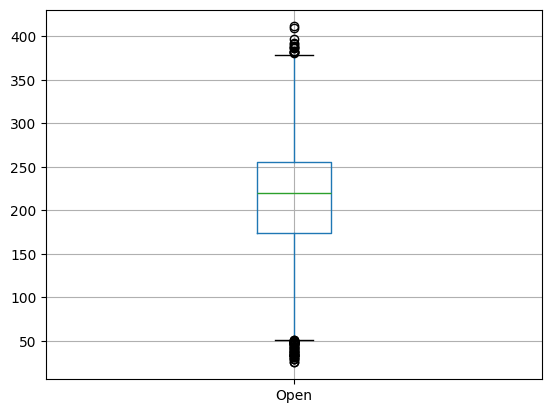

Axes(0.125,0.11;0.775x0.77)
High


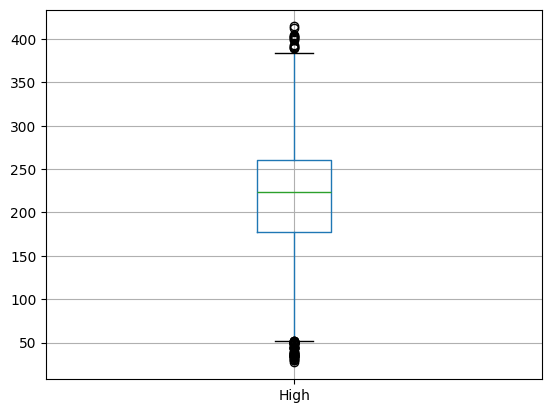

Axes(0.125,0.11;0.775x0.77)
Low


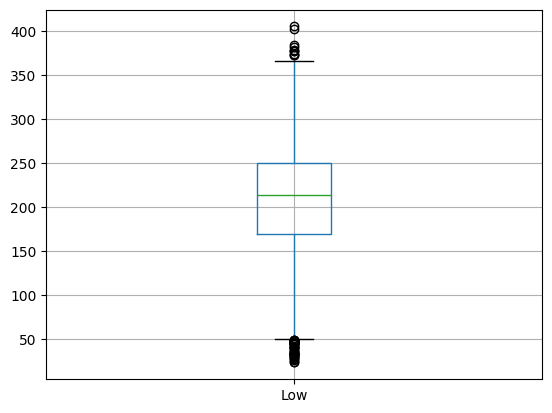

Axes(0.125,0.11;0.775x0.77)
Close


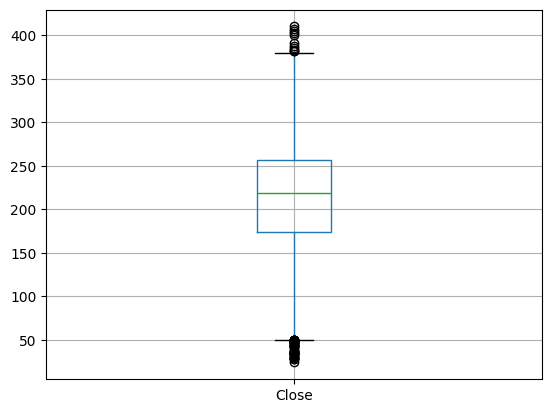

Axes(0.125,0.11;0.775x0.77)
Adj Close


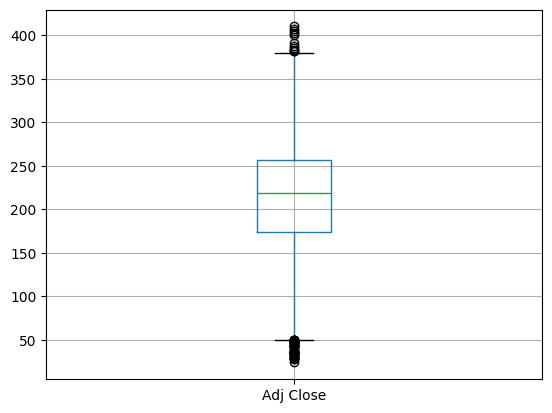

Axes(0.125,0.11;0.775x0.77)
Volume


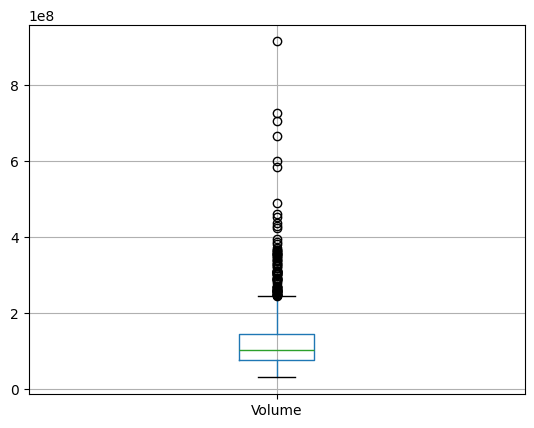

Axes(0.125,0.11;0.775x0.77)
SMA_10


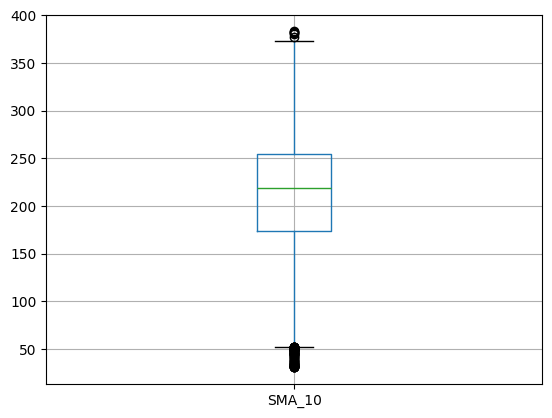

Axes(0.125,0.11;0.775x0.77)
EMA_10


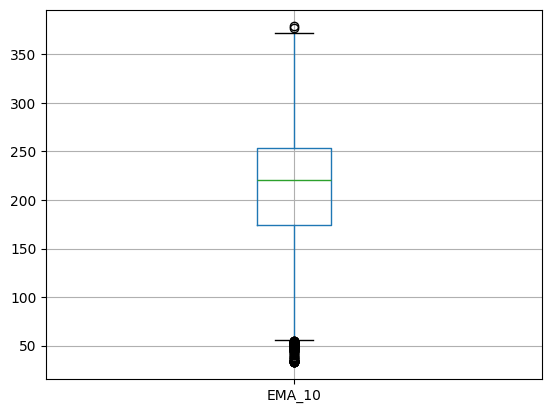

Axes(0.125,0.11;0.775x0.77)
RSI_10


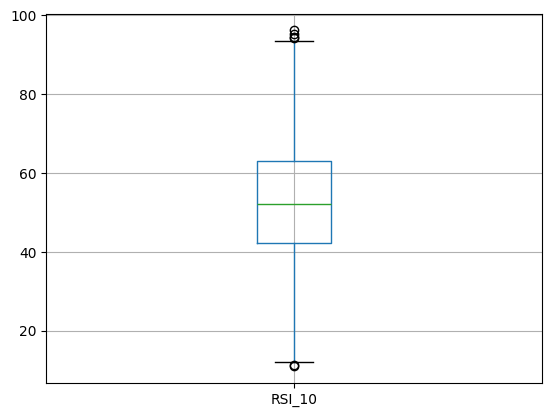

Axes(0.125,0.11;0.775x0.77)
MACD


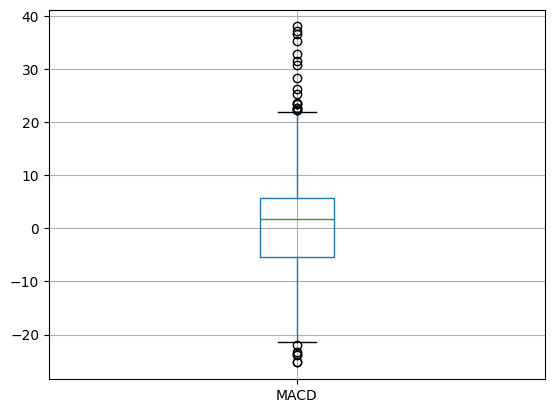

Axes(0.125,0.11;0.775x0.77)
MACD_Histogram


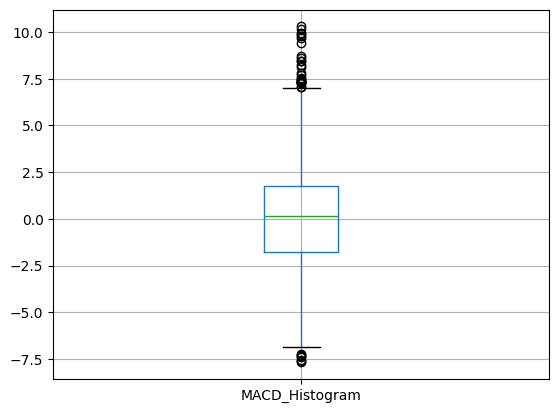

Axes(0.125,0.11;0.775x0.77)
BBL_20_2.0


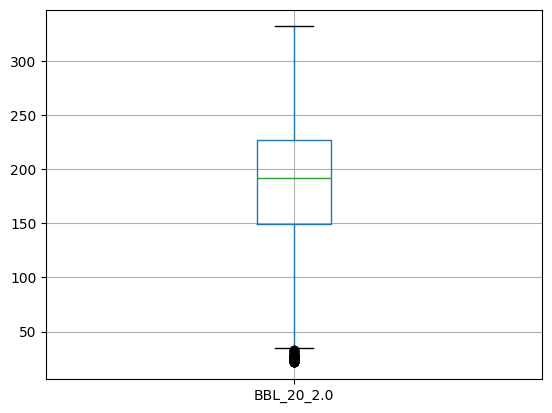

Axes(0.125,0.11;0.775x0.77)
BBM_20_2.0


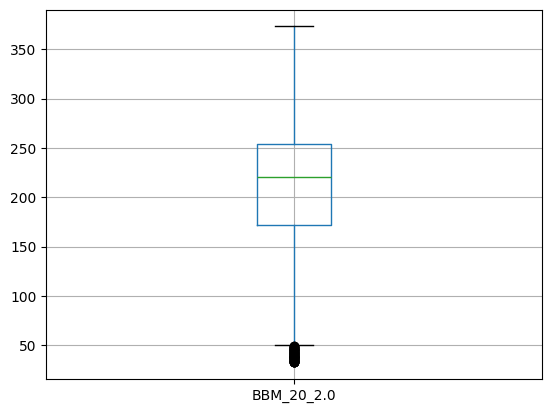

Axes(0.125,0.11;0.775x0.77)
BBU_20_2.0


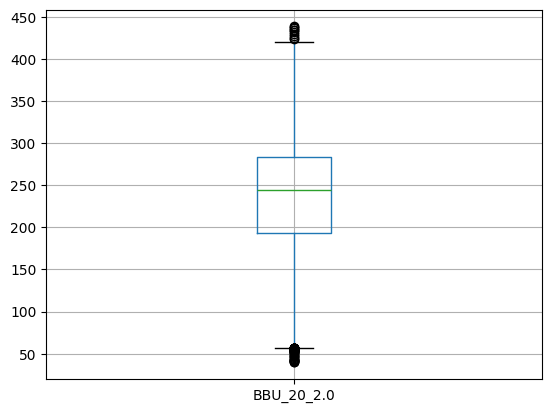

Axes(0.125,0.11;0.775x0.77)
BBB_20_2.0


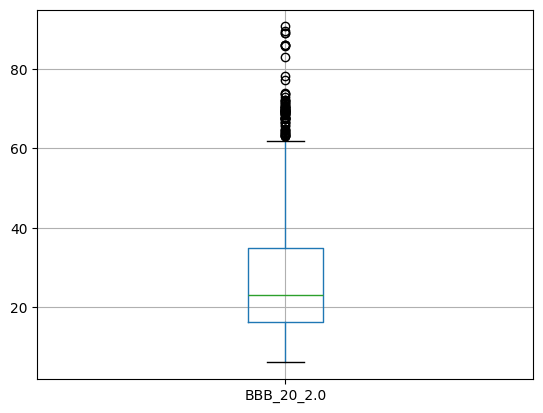

Axes(0.125,0.11;0.775x0.77)
BBP_20_2.0


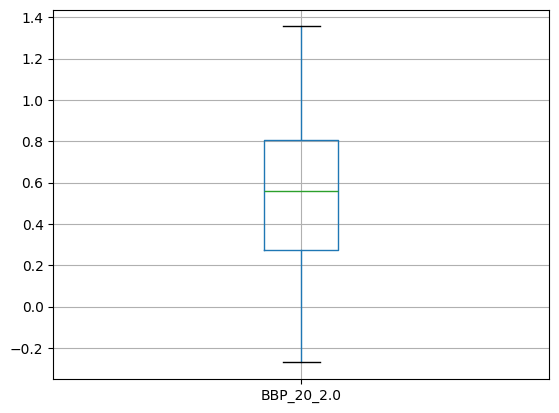

Axes(0.125,0.11;0.775x0.77)
ATRr_14


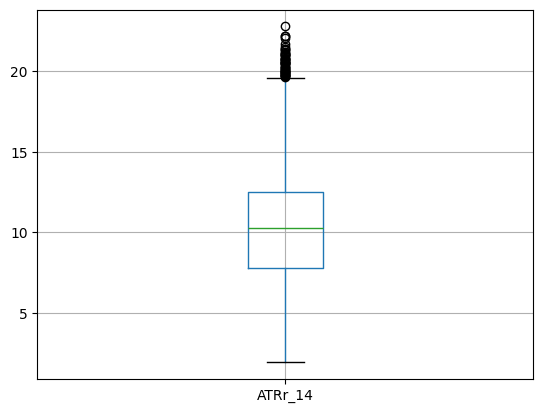

Axes(0.125,0.11;0.775x0.77)
stoch_k


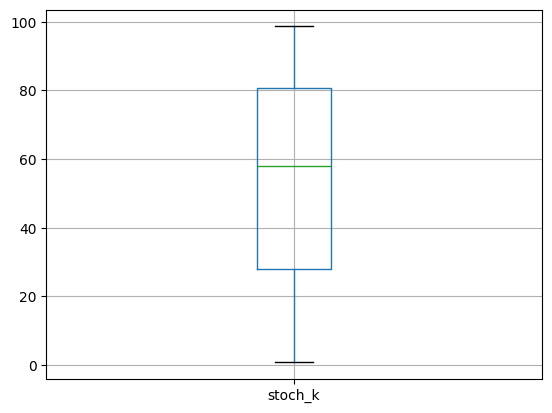

Axes(0.125,0.11;0.775x0.77)
stoch_d


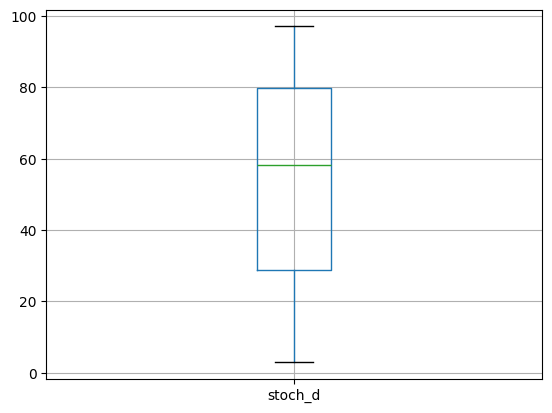

In [44]:
for colout in nome_colunas:
    a = df.boxplot(column=[colout])
    print(f"{a}\n{colout}")
    a = 0
    plt.show()
    

### Tratando Outliers

Tratando base de dados 1: hist_BBAS3
Tratando a coluna: Open
Tratando a coluna: High
Tratando a coluna: Low
Tratando a coluna: Close
Tratando a coluna: Adj Close
Tratando a coluna: Volume
Tratando a coluna: SMA_10
Tratando a coluna: EMA_10
Tratando a coluna: RSI_10
Tratando a coluna: MACD
Tratando a coluna: MACD_Histogram
Tratando a coluna: BBL_20_2.0
Tratando a coluna: BBM_20_2.0
Tratando a coluna: BBU_20_2.0
Tratando a coluna: BBB_20_2.0
Tratando a coluna: BBP_20_2.0
Tratando a coluna: ATRr_14
Tratando a coluna: stoch_k
Tratando a coluna: stoch_d
   Unnamed: 0.1  Unnamed: 0        Date    Open       High        Low  \
0             0           0  2020-01-29  25.500  25.690001  24.680000   
1             1           1  2020-01-30  24.350  24.995001  24.184999   
2             2           2  2020-01-31  24.555  24.559999  24.110001   
3             3           3  2020-02-03  24.275  24.570000  24.004999   
4             4           4  2020-02-04  24.645  24.799999  24.125000   

      

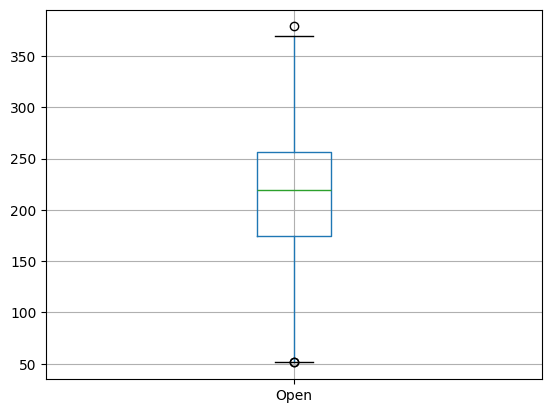

Axes(0.125,0.11;0.775x0.77)
High


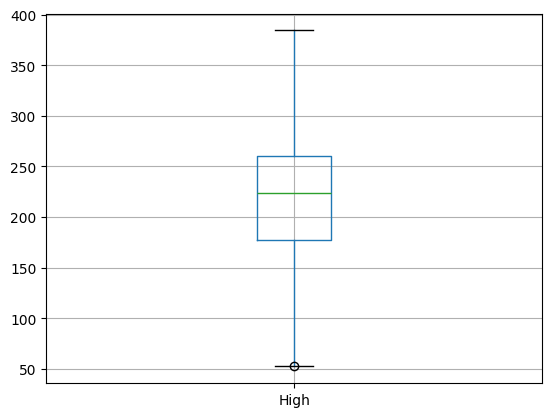

Axes(0.125,0.11;0.775x0.77)
Low


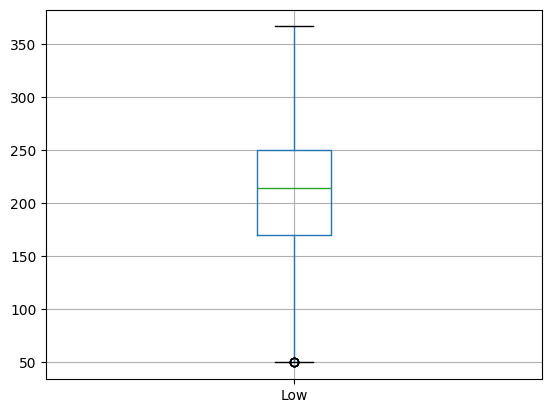

Axes(0.125,0.11;0.775x0.77)
Close


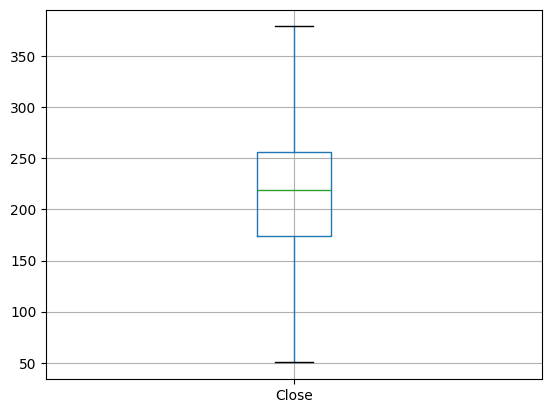

Axes(0.125,0.11;0.775x0.77)
Adj Close


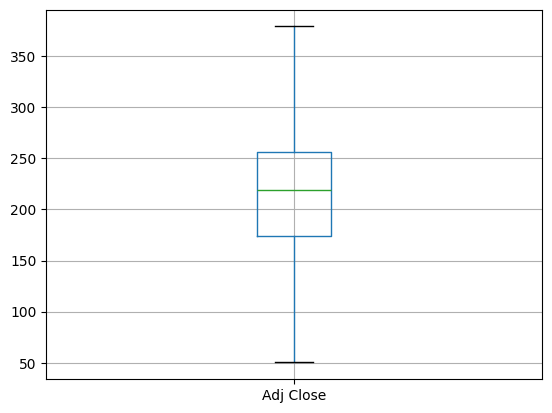

Axes(0.125,0.11;0.775x0.77)
Volume


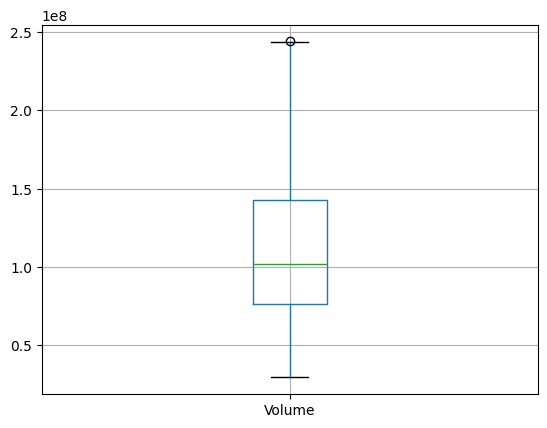

Axes(0.125,0.11;0.775x0.77)
SMA_10


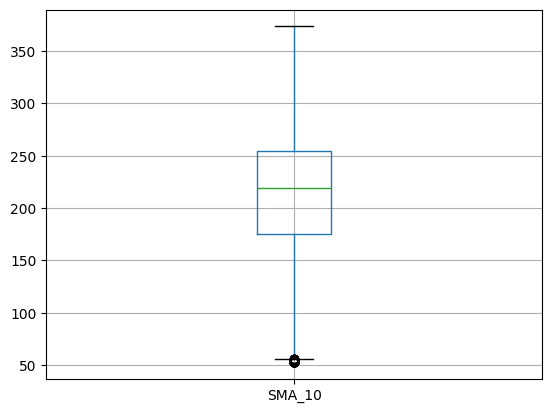

Axes(0.125,0.11;0.775x0.77)
EMA_10


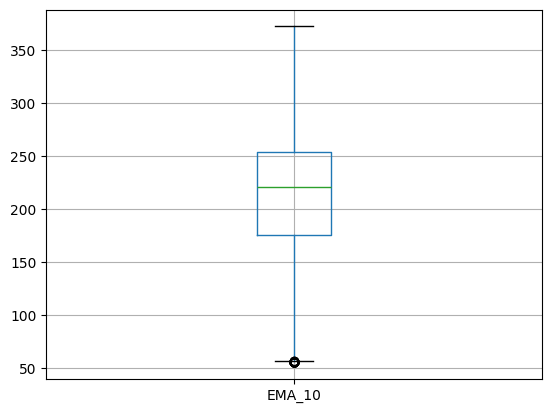

Axes(0.125,0.11;0.775x0.77)
RSI_10


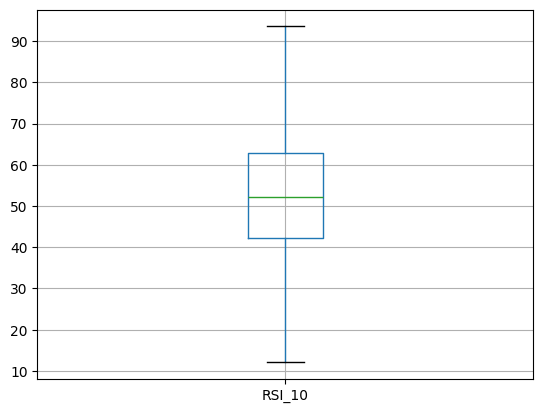

Axes(0.125,0.11;0.775x0.77)
MACD


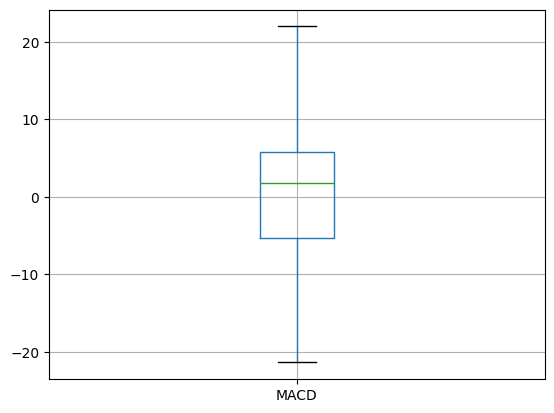

Axes(0.125,0.11;0.775x0.77)
MACD_Histogram


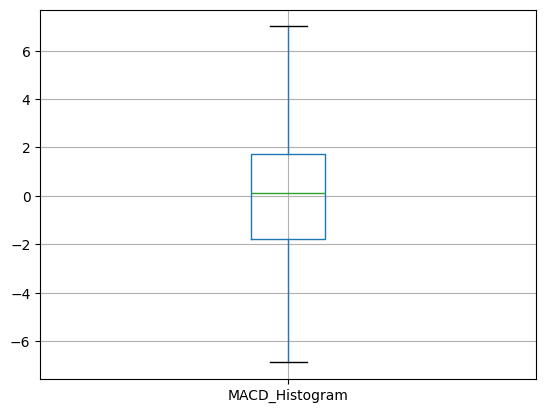

Axes(0.125,0.11;0.775x0.77)
BBL_20_2.0


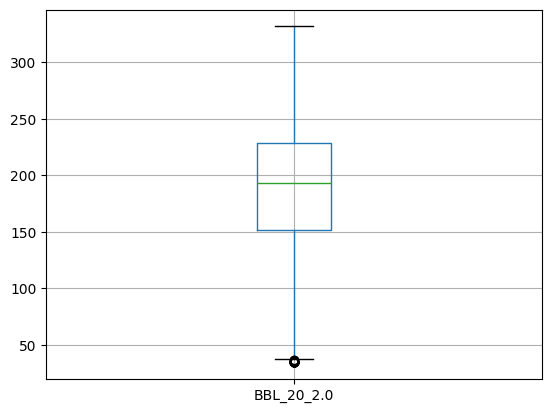

Axes(0.125,0.11;0.775x0.77)
BBM_20_2.0


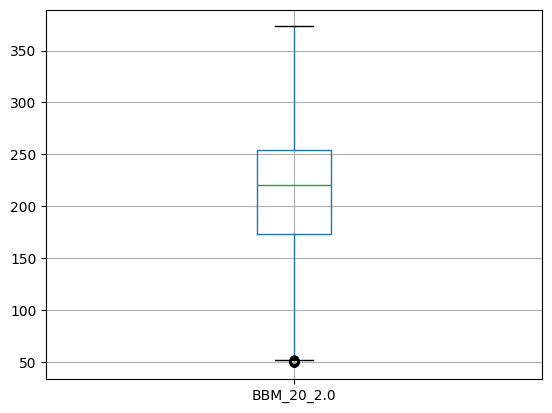

Axes(0.125,0.11;0.775x0.77)
BBU_20_2.0


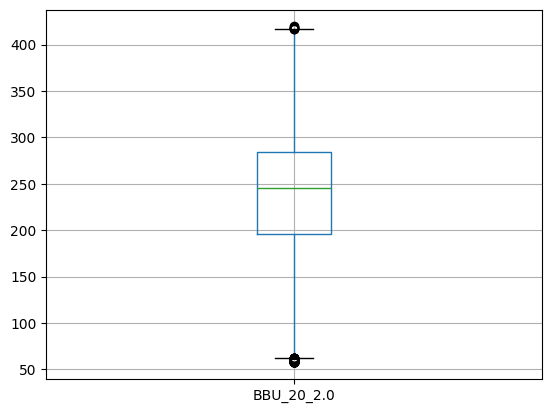

Axes(0.125,0.11;0.775x0.77)
BBB_20_2.0


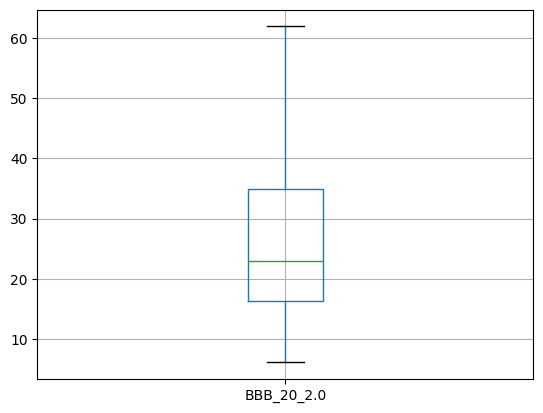

Axes(0.125,0.11;0.775x0.77)
BBP_20_2.0


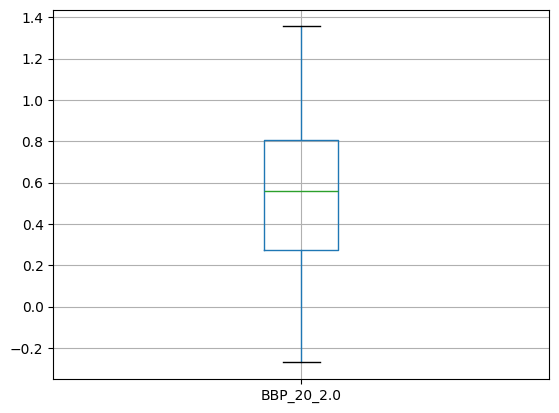

Axes(0.125,0.11;0.775x0.77)
ATRr_14


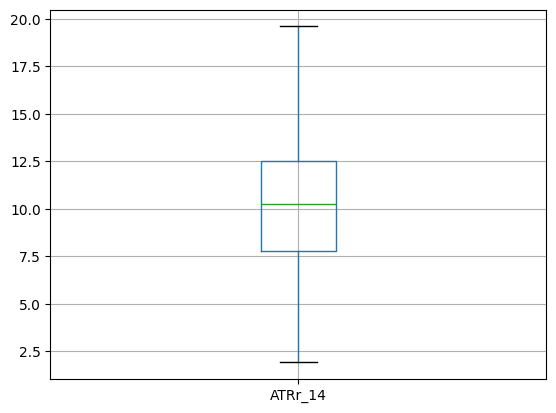

Axes(0.125,0.11;0.775x0.77)
stoch_k


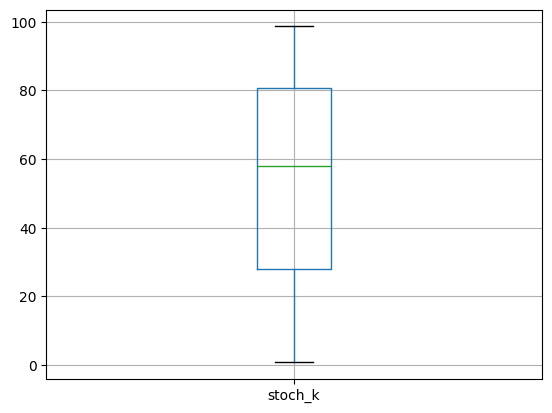

Axes(0.125,0.11;0.775x0.77)
stoch_d


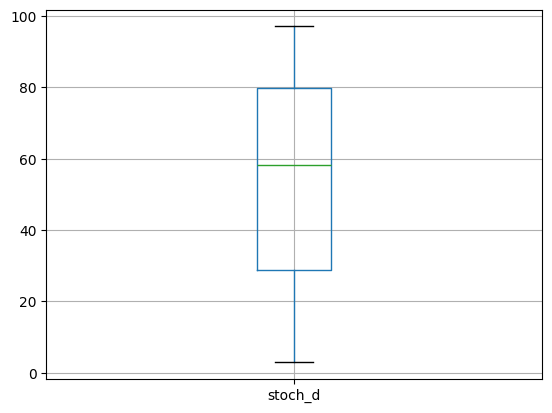

In [45]:
# lista_arquivos VARIÁVEL COM O NOME DAS BASES

# Colunas para tratar os outliers
# print(type(df))
# print(df)

# Laço para percorrer cada base de dados (cada arquivo)
for i, arq in enumerate(lista_arquivos):
    print(f"Tratando base de dados {i + 1}: {arq}")
    
    df = pd.read_csv(f"Base_dados/{arq}")
    
    # Percorrer cada coluna que precisa ser tratada
    for coluna in nome_colunas:
        # Verificar se a coluna existe no DataFrame (evitar erros)
        if coluna in df.columns:
            print(f"Tratando a coluna: {coluna}")

            # Calcular o IQR para a coluna atual
            Q1 = df[coluna].quantile(0.25)
            Q3 = df[coluna].quantile(0.75)
            IQR = Q3 - Q1

            limite_inferior = Q1 - 1.5 * IQR
            limite_superior = Q3 + 1.5 * IQR

            # Marcar os outliers como NaN
            df[coluna] = df[coluna].apply(lambda x: None if (x < limite_inferior or x > limite_superior) else x)

            # Interpolar os valores NaN (outliers) usando interpolação linear
            df[coluna] = df[coluna].interpolate()

        else:
            print(f"Coluna {coluna} não encontrada no DataFrame.")
    
    # Exibir uma amostra da base tratada para verificação
    print(df.head())
    
for colout in nome_colunas:
    a = df.boxplot(column=[colout])
    print(f"{a}\n{colout}")
    a = 0
    plt.show()
# # # Opcional: Salvar os outliers em um arquivo CSV
# # outliers.to_csv('outliers_Volume.csv', index=False)


### 4.1 Definindo a coluna 'DATE' como indice e removendo demais colunas indesejadas

In [46]:
%%time
# define o indice no final pois depois de algum tratamento ele muda

# Percorrer cada arquivo na lista de arquivos
for arq in lista_arquivos:
    # Ler o arquivo CSV
    df = pd.read_csv(f"Base_dados/{arq}")
    
    # Remover as colunas que não estão nas colunas oficiais
    colunas_lixo = [col for col in df.columns if col not in colunas_oficiais]
    
    if colunas_lixo:
        df = df.drop(columns=colunas_lixo)
    
    # Verificar se a coluna 'Date' existe e definir como índice
    if 'Date' in df.columns:
        df = df.set_index('Date')
    
    # Salvar o DataFrame atualizado no mesmo arquivo
    df.to_csv(f"Base_dados/{arq}", index=True)

    # Exibir as primeiras linhas do DataFrame para verificação (opcional)
    print(df.head())


              Open       High        Low      Close  Adj Close      Volume  \
Date                                                                         
2020-01-29  25.500  25.690001  24.680000  24.730000  18.075031  16800400.0   
2020-01-30  24.350  24.995001  24.184999  24.900000  18.199284  25079800.0   
2020-01-31  24.555  24.559999  24.110001  24.270000  17.738815  32252800.0   
2020-02-03  24.275  24.570000  24.004999  24.389999  17.826527  20402800.0   
2020-02-04  24.645  24.799999  24.125000  24.125000  17.632841  23533200.0   

             SMA_10     EMA_10     RSI_10      MACD  MACD_Histogram  \
Date                                                                  
2020-01-29  24.9610  25.132101  40.316762 -0.407259        0.043456   
2020-01-30  24.9785  25.089901  43.272728 -0.397243        0.042777   
2020-01-31  24.8995  24.940828  35.942692 -0.435126        0.003916   
2020-02-03  24.8485  24.840677  38.159656 -0.450275       -0.008986   
2020-02-04  24.8430  24.710

In [47]:
print(lista_colunass)

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA_10', 'EMA_10', 'RSI_10', 'MACD', 'MACD_Histogram', 'BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0', 'BBB_20_2.0', 'BBP_20_2.0', 'ATRr_14', 'stoch_k', 'stoch_d']


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1184 entries, 2020-01-30 to 2024-10-11
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            1184 non-null   float64
 1   High            1184 non-null   float64
 2   Low             1184 non-null   float64
 3   Close           1184 non-null   float64
 4   Adj Close       1184 non-null   float64
 5   Volume          1184 non-null   float64
 6   SMA_10          1184 non-null   float64
 7   EMA_10          1184 non-null   float64
 8   RSI_10          1184 non-null   float64
 9   MACD            1184 non-null   float64
 10  MACD_Histogram  1184 non-null   float64
 11  BBL_20_2.0      1184 non-null   float64
 12  BBM_20_2.0      1184 non-null   float64
 13  BBU_20_2.0      1184 non-null   float64
 14  BBB_20_2.0      1184 non-null   float64
 15  BBP_20_2.0      1184 non-null   float64
 16  ATRr_14         1184 non-null   float64
 17  stoch_k         1184 no

In [49]:
df.isnull().sum()

Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
SMA_10            0
EMA_10            0
RSI_10            0
MACD              0
MACD_Histogram    0
BBL_20_2.0        0
BBM_20_2.0        0
BBU_20_2.0        0
BBB_20_2.0        0
BBP_20_2.0        0
ATRr_14           0
stoch_k           0
stoch_d           0
dtype: int64